# Stripe Payouts Assignment

By: Khalid

Email: kshaikhq@uwaterloo.ca

**Stripe Connect is a product that allows platform businesses to pay out money to other businesses all over the world. In this project, you will analyze the payout behavior of Stripe platforms. A platform is a Stripe user that enables other businesses to process payments with Stripe.**


**Data:** The dataset `payouts.csv` has daily payout amounts (in cents) from platforms to recipients. Both platforms and recipients are represented by a merchant id. In the dataset, the platform merchant is specified by `platform_id` and the recipient is specified by `recipient_id`. The dataset `countries.csv` maps merchants to countries and the dataset `industries.csv` maps merchants to industries.

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import the datasets
payouts_df = pd.read_csv("payouts.csv")
industries_df = pd.read_csv("industries.csv")
countries_df = pd.read_csv("countries.csv")

payouts_df.head(10)

,date,platform_id,recipient_id,count,amount
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.0
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.0
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.0
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.0
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.0
5,2018-08-04 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_5712f24388abd73ca43d6d7f97006499,1,26662.0
6,2018-12-25 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_d160e5b08459d82b999c97aaed321c00,1,73610.0
7,2018-10-02 00:00:00+00:00,id_296420e88b94f7b67b7bb305ac82a0e4,id_c890ff2bec7ffeb35204968a841ea0bc,1,19475.0
8,2018-07-23 00:00:00+00:00,id_9274489f1aaeaffc6f14b6ebf9685ebc,id_a8a6aa9b44a4584f0514866fc814658c,1,2095.0
9,2018-11-09 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_342e7ab8f208baff88ac6ddd7f31864a,1,19351.0


In [19]:
industries_df.head(10)

,merchant_id,industry
0,id_ace715763434d4fd4eda58c9e9d692c6,Travel & Hospitality
1,id_717b4a0f74912f18146c0708b330a3d9,Food & Beverage
2,id_671fd54bccd294b502fea89c0cc5a690,Professional Services (non-medical)
3,id_d8ed94b4e446b868e38efa8efa34b702,Travel & Hospitality
4,id_1a054e523cbf203b16b38fc3e5b19b25,Professional Services (non-medical)
5,id_e0e9c123701fe100d70da68aab7e6c10,Other Services
6,id_e2fc57fab44cf0ac5e15948d1243feab,Other Services
7,id_05342ceb9b6d2392c3edc53c215abb39,Other Services
8,id_34ef44dda6166a00e0c2551558213387,Travel & Hospitality
9,id_ed5981b26346fd534add73d2013a4923,Food & Beverage


In [20]:
countries_df.head(10)

,merchant_id,country
0,id_ace715763434d4fd4eda58c9e9d692c6,FR
1,id_717b4a0f74912f18146c0708b330a3d9,US
2,id_671fd54bccd294b502fea89c0cc5a690,US
3,id_d8ed94b4e446b868e38efa8efa34b702,FR
4,id_1a054e523cbf203b16b38fc3e5b19b25,US
5,id_e0e9c123701fe100d70da68aab7e6c10,US
6,id_e2fc57fab44cf0ac5e15948d1243feab,FR
7,id_05342ceb9b6d2392c3edc53c215abb39,FR
8,id_34ef44dda6166a00e0c2551558213387,US
9,id_ed5981b26346fd534add73d2013a4923,US


In [21]:
# Function to check for missing values in a DataFrame and print a summary
def check_missing_values(df, df_name):
    print(f"Missing values in {df_name}:")
    print(df.isnull().sum())
    print("\n")

# Check for missing values in each dataset
check_missing_values(payouts_df, "payouts")
check_missing_values(industries_df, "industries")
check_missing_values(countries_df, "countries")

Missing values in payouts:
date            0
platform_id     0
recipient_id    0
count           0
amount          0
dtype: int64


Missing values in industries:
merchant_id    0
industry       1
dtype: int64


Missing values in countries:
merchant_id    0
country        0
dtype: int64




In [22]:
# Fill missing values in the 'industry' column with "Unknown"
industries_df['industry'] = industries_df['industry'].fillna("Unknown")

In [23]:
# Check unique values for industries
industries_df.industry.unique()

array(['Travel & Hospitality', 'Food & Beverage',
       'Professional Services (non-medical)', 'Other Services',
       'Other Software & Content', 'Non-profit',
       'Tickets: concerts,sports,movies,conventions', 'Retail Fashion',
       'Content', 'Healthcare', 'Education', 'Other Retail',
       'Direct Services: classes,memberships,appointments',
       'Financial Services', 'internet software & services',
       'Real Estate', 'Unknown', 'hotels, restaurants & leisure'],
      dtype=object)

In [24]:
# Merge the payouts data with the countries and industries data
# First, merge payouts with countries based on 'recipient_id' to get the country of each recipient
merged_df = pd.merge(payouts_df, countries_df, left_on='recipient_id', right_on='merchant_id', how='inner')

# Then, merge the result with industries data based on 'recipient_id' to get the industry of each recipient
final_df = pd.merge(merged_df, industries_df, left_on='recipient_id', right_on='merchant_id', how='inner', suffixes=('', '_drop'))

# Remove the unwanted 'merchant_id_x' and 'merchant_id_y' columns
# Since we used suffixes=('', '_drop'), we only need to remove columns ending with '_drop'
final_df = final_df[[c for c in final_df.columns if not c.endswith('_drop')]]

# Convert the amount in Dollars (from cents):
final_df['amount'] = final_df['amount']/100

final_df.head(10)

,date,platform_id,recipient_id,count,amount,merchant_id,country,industry
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,97.86,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
1,2018-05-23 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,570.61,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
2,2018-09-18 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,592.20,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
3,2018-07-29 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,503.61,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
4,2018-06-05 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,107.91,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
5,2018-09-10 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,733.84,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
6,2018-06-24 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,447.80,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
7,2018-07-11 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,591.97,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
8,2018-10-08 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,813.31,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"
9,2018-09-19 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,822.42,id_23d90ec275370c686dedd7dc1c5e93b3,US,"Tickets: concerts,sports,movies,conventions"


In [25]:
# Group by 'country' and 'date', then sum 'amount' for each group
grouped_sum = final_df.groupby(['country', 'date'])['amount'].sum().reset_index()

# Display the grouped and summed DataFrame
print(grouped_sum)


     country                       date      amount
0         AT  2018-01-01 00:00:00+00:00       24.87
1         AT  2018-01-02 00:00:00+00:00     1446.87
2         AT  2018-01-03 00:00:00+00:00      470.83
3         AT  2018-01-04 00:00:00+00:00      275.41
4         AT  2018-01-05 00:00:00+00:00      214.91
...      ...                        ...         ...
7746      US  2018-12-27 00:00:00+00:00  2692297.84
7747      US  2018-12-28 00:00:00+00:00  2940939.05
7748      US  2018-12-29 00:00:00+00:00  1947448.42
7749      US  2018-12-30 00:00:00+00:00  3251277.88
7750      US  2018-12-31 00:00:00+00:00  3536931.57

[7751 rows x 3 columns]


In [28]:
# Group data by country and calculate unique counts for platforms and recipients
unique_counts_by_country = final_df.groupby('country').agg({
    'platform_id': 'nunique',
    'recipient_id': 'nunique'
}).reset_index()

# Rename columns for clarity
unique_counts_by_country.rename(columns={
    'platform_id': 'Unique Platforms',
    'recipient_id': 'Unique Recipients'
}, inplace=True)

print(unique_counts_by_country)

   country  Unique Platforms  Unique Recipients
0       AT                10                593
1       AU                33               1397
2       BE                10               2341
3       BR                 5                526
4       CA                25               1417
5       CH                10                490
6       DE                14               2450
7       DK                10                 97
8       ES                16               2654
9       FI                 9                 71
10      FR                45              22850
11      GB                49               2899
12      HK                 4               4917
13      IE                12                152
14      IT                17                480
15      JP                11               2163
16      LU                 3                 55
17      MX                 2                 11
18      NL                 7                152
19      NO                16            

In [29]:
#grouped_sum.to_excel("grouped_sum.xlsx")

# **Problem Statement 1:** Using the data provided, please provide an estimate for the amount of money we should expect to be paid out to each country on Jan. 1, 2019 (the day after the last day in the dataset).

In [33]:
# Uncomment the following line if the pmdarima module is not installed

#!pip install pmdarima

In [34]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

daily_payouts = final_df.copy()
# Make sure 'date' is in datetime format and not set as the index yet
daily_payouts['date'] = pd.to_datetime(daily_payouts['date'])

# Aggregate data by country and date to ensure unique indices
aggregated_payouts = daily_payouts.groupby(['country', 'date'])['amount'].sum().reset_index()

# Prepare DataFrame for forecasted payouts
forecasted_payouts_all_countries = pd.DataFrame(columns=['Country', 'Forecasted Payout for Jan 1, 2019 ($)'])

for country in aggregated_payouts['country'].unique():
    print(f"Processing {country}...")
    country_data = aggregated_payouts[aggregated_payouts['country'] == country]

    # Set 'date' as index after ensuring it's unique
    country_data = country_data.set_index('date')

    # Ensure daily frequency, fill missing days with the mean of the non-missing data
    country_data = country_data['amount'].asfreq('D', method='ffill')  # Forward fill method chosen as example

    # Find the best SARIMAX parameters
    auto_model = auto_arima(country_data, seasonal=True, m=12, stepwise=True, suppress_warnings=True, error_action="ignore")

    # Fit SARIMAX model
    model = SARIMAX(country_data, order=auto_model.order, seasonal_order=auto_model.seasonal_order)
    model_fit = model.fit(disp=False)

    # Forecast the next day
    forecast = model_fit.forecast(steps=1)

    # Append the forecast to the DataFrame
    forecasted_payouts_all_countries = forecasted_payouts_all_countries.append({
        'Country': country,
        'Forecasted Payout for Jan 1, 2019 ($)': f"${forecast.iloc[0]:,.2f}"
    }, ignore_index=True)

print(f"All countries processed ! Execute the next line of code.")

# Display the forecasted payouts table
#forecasted_payouts_all_countries

# Save output in the excel file (same directory)
#forecasted_payouts_all_countries.to_excel("forecasted_payouts_all_countries.xlsx")

Processing AT...
Processing AU...
Processing BE...
Processing BR...
Processing CA...
Processing CH...
Processing DE...
Processing DK...
Processing ES...
Processing FI...
Processing FR...
Processing GB...
Processing HK...
Processing IE...
Processing IT...
Processing JP...
Processing LU...
Processing MX...
Processing NL...
Processing NO...
Processing NZ...
Processing PT...
Processing SE...
Processing SG...
Processing US...


In [35]:
forecasted_payouts_all_countries

,Country,"Forecasted Payout for Jan 1, 2019 ($)"
0,AT,"$7,172.40"
1,AU,"$65,371.43"
2,BE,"$5,849.31"
3,BR,"$4,189.49"
4,CA,"$83,824.54"
5,CH,"$3,085.50"
6,DE,"$21,857.65"
7,DK,"$3,646.95"
8,ES,"$29,634.60"
9,FI,"$3,548.89"


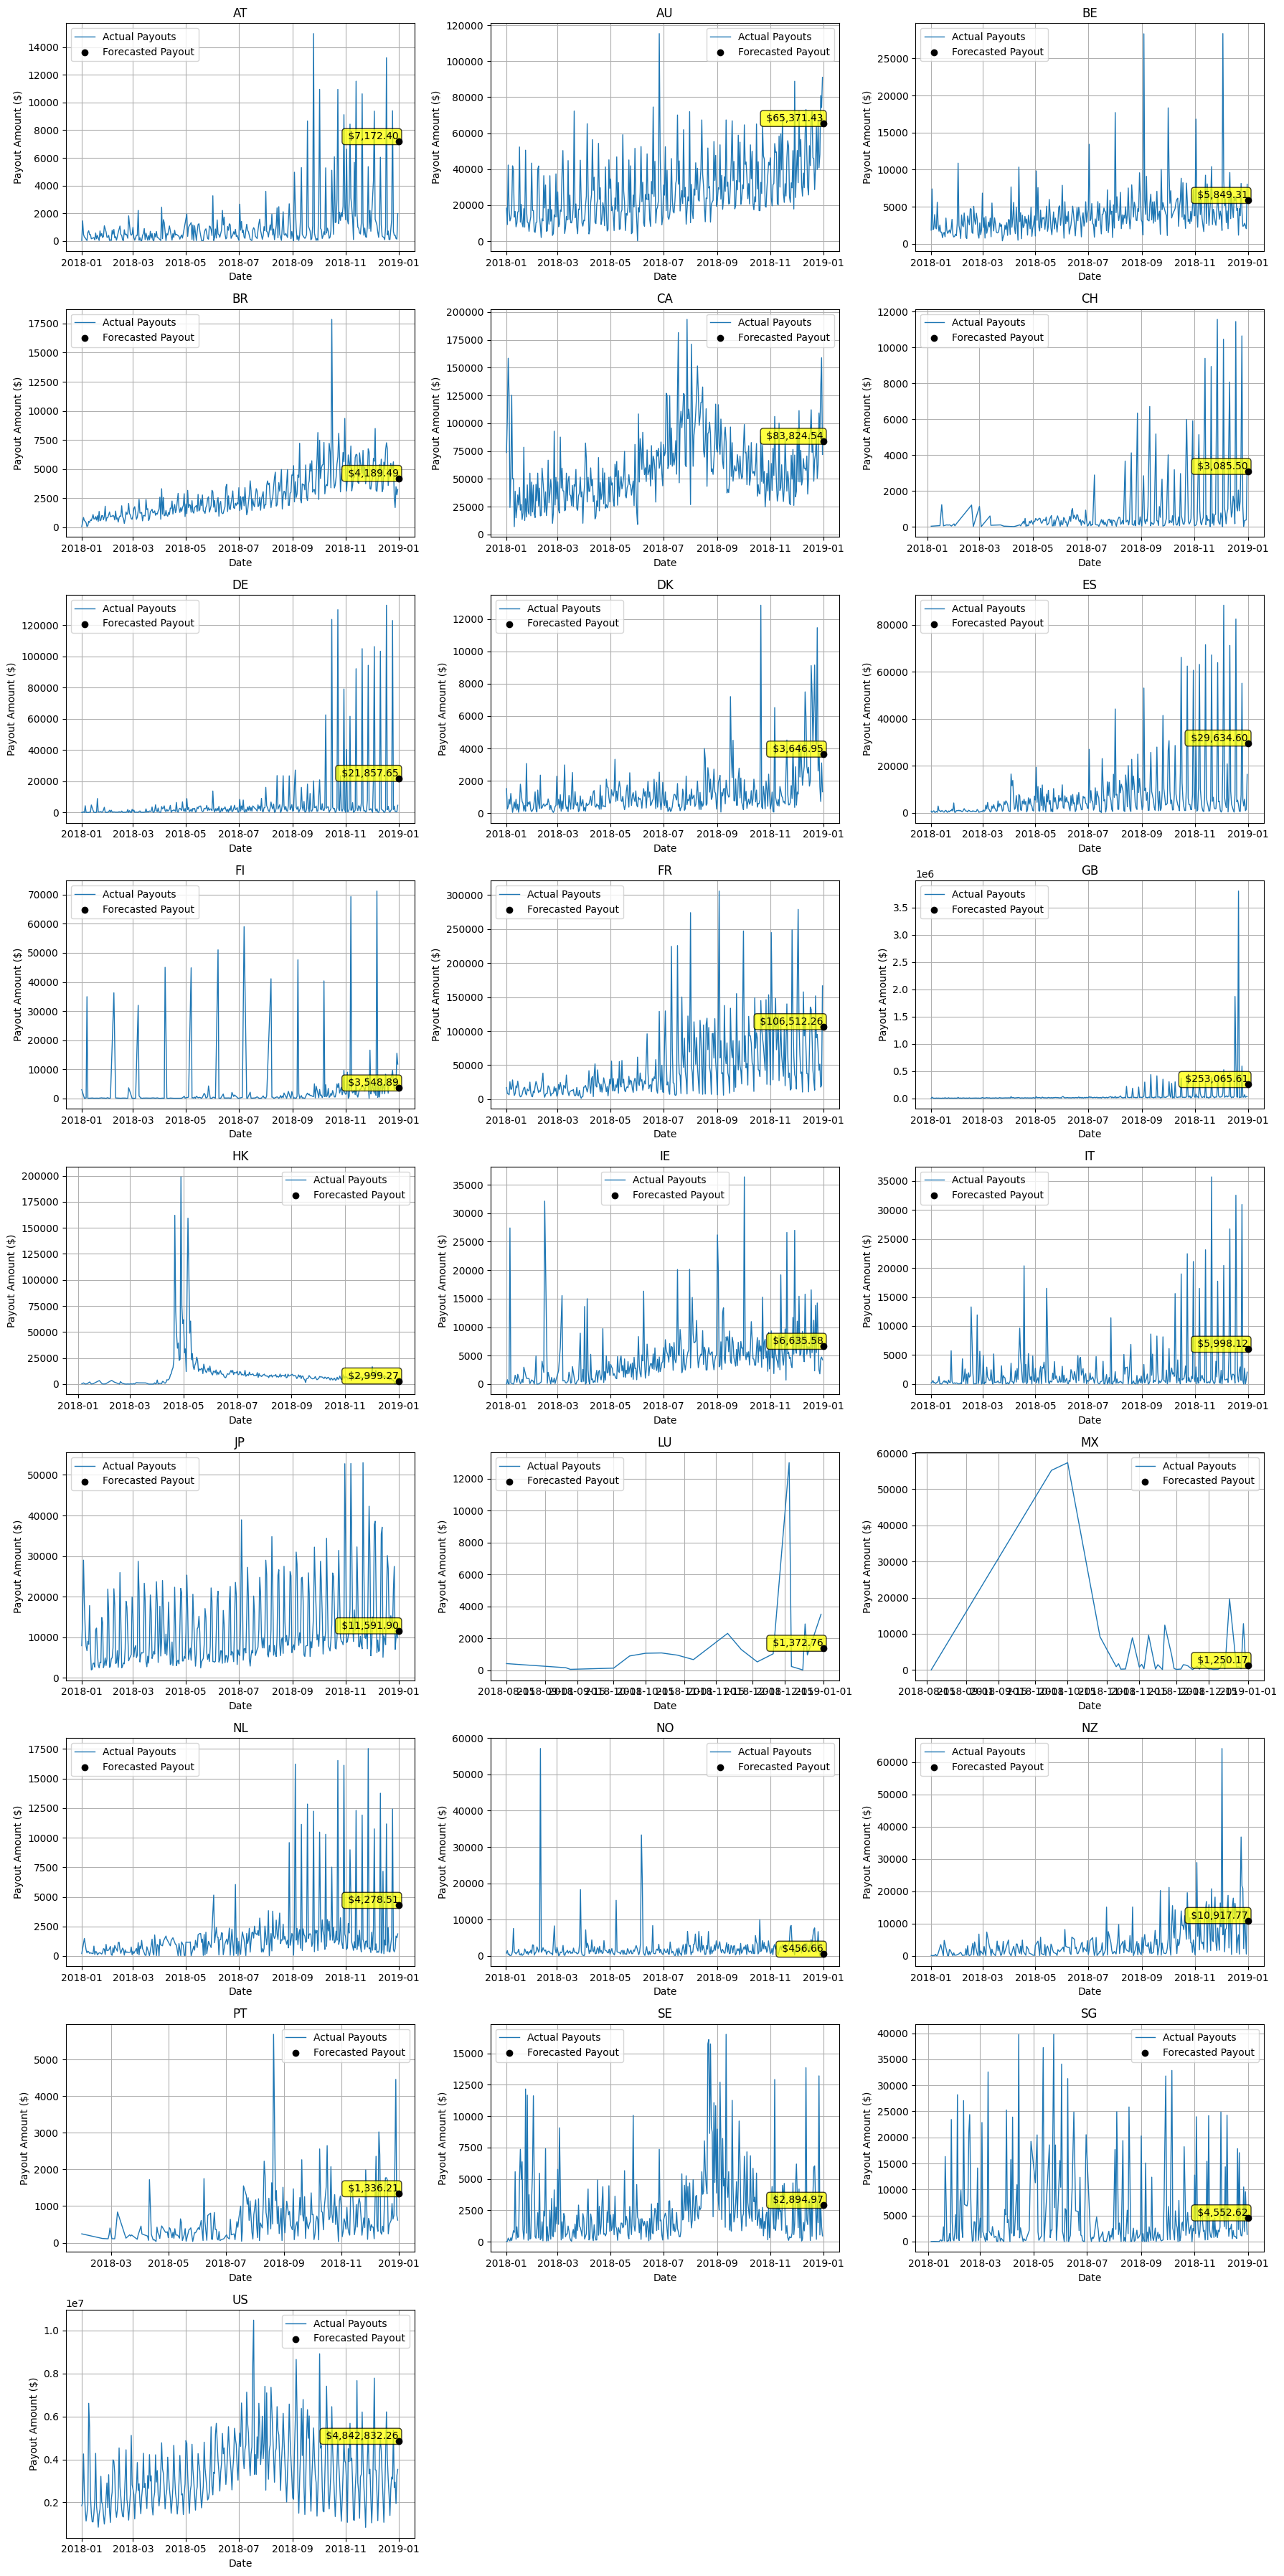

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np

# Ensure 'date' is a datetime type and 'amount' is float
final_df['date'] = pd.to_datetime(final_df['date'])
final_df['amount'] = final_df['amount'].astype(float)

# Remove dollar signs and commas, then convert to float
forecasted_payouts_all_countries['Forecasted Payout for Jan 1, 2019 ($)'] = forecasted_payouts_all_countries['Forecasted Payout for Jan 1, 2019 ($)'].replace('[\$,]', '', regex=True).astype(float)

# Group by country and date to get daily totals
daily_totals = final_df.groupby(['country', 'date'])['amount'].sum().reset_index()

# Plotting
countries = daily_totals['country'].unique()

# Convert 'date' to datetime format
daily_totals['date'] = pd.to_datetime(daily_totals['date'])

# Ensure your forecasting date is in the correct datetime format
forecast_date = pd.to_datetime('2019-01-01')

# Determine the number of plots and calculate rows needed for 2 plots per row
countries = daily_totals['country'].unique()
n_plots = len(countries)
n_rows = (n_plots + 2) // 3  # Ensure there's enough rows for all countries

plt.figure(figsize=(18, 4 * n_rows))  # Adjust the figure size as needed

for i, country in enumerate(countries, 1):
    plt.subplot(n_rows, 3, i)
    country_data = daily_totals[daily_totals['country'] == country]

    # Plot the actual payouts with fine-dashed line
    plt.plot(country_data['date'], country_data['amount'], label='Actual Payouts', linestyle='-', linewidth=1)

    # Find and plot the forecasted payout
    forecasted_value = forecasted_payouts_all_countries[forecasted_payouts_all_countries['Country'] == country]['Forecasted Payout for Jan 1, 2019 ($)'].values[0]
    plt.scatter(forecast_date, forecasted_value, color='black', label='Forecasted Payout', zorder=5)

    plt.text(forecast_date, forecasted_value, f' ${forecasted_value:,.2f}', color='black',
             verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.75))

    # Formatting each subplot
    plt.title(f'{country}')
    plt.xlabel('Date')
    plt.ylabel('Payout Amount ($)')
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

plt.show()

# **Problem Statement 2:** Assume that one year from the end of the dataset, we will have 15 platforms from the Education industry, 5 from Hotels, Restaurants & Leisure and 40 from Food & Beverage. How much total payout volume do you expect to see on a typical day in 2019, from these three industries?

**Calculate Average Daily Payout Per Platform for Each Industry**

In [42]:
# Ensure 'date' is a datetime type
payouts_df['date'] = pd.to_datetime(payouts_df['date'])

# Convert Cents to Dollars by dividing the amount column by 100
payouts_df['amount'] = payouts_df['amount'] / 100

# Merge payouts with industries to associate each payout with its industry
payouts_with_industry = pd.merge(payouts_df, industries_df, left_on='platform_id', right_on='merchant_id')

# Filter payouts for the last complete year in the dataset, assuming it's 2018
payouts_last_year = payouts_with_industry[payouts_with_industry['date'].dt.year == 2018]

# Aggregate payouts by industry and day, then calculate the average daily amount
daily_payouts_by_industry = payouts_last_year.groupby(['industry', payouts_last_year['date'].dt.date])['amount'].sum().reset_index()
average_daily_payout_by_industry = daily_payouts_by_industry.groupby('industry')['amount'].mean()

# Calculate the number of platforms per industry in the last year
platform_counts = payouts_last_year.groupby('industry')['platform_id'].nunique()

In [43]:
# Future platform counts for 2019
future_platform_counts = {
    'Education': 15,
    'hotels, restaurants & leisure': 5,
    'Food & Beverage': 40
}


**Estimate Total Daily Payout for 2019**

In [44]:
# Assuming future_platform_counts and other variables are defined as before

# Initialize a dictionary to store the estimated daily payouts for 2019 by industry
estimated_daily_payouts_2019_by_industry = {}

for industry, future_platforms in future_platform_counts.items():
    # Calculate the average daily payout per platform for the industry
    avg_daily_payout_per_platform = average_daily_payout_by_industry.get(industry, 0) / platform_counts.get(industry, 1)

    # Estimate the total daily payout for 2019 for the industry
    estimated_daily_payout = avg_daily_payout_per_platform * future_platforms

    # Store the result in the dictionary
    estimated_daily_payouts_2019_by_industry[industry] = estimated_daily_payout

    # Print detailed results for the industry
    print(f"\nIndustry: {industry}")
    print(f"  - Average daily payout per platform in 2018: ${avg_daily_payout_per_platform:,.2f}")
    print(f"  - Number of platforms in 2019: {future_platforms}")
    print(f"  - Estimated total daily payout volume for 2019: ${estimated_daily_payout:,.2f}")

# Calculate and print the total of these industries combined:
total_estimated_daily_payouts_2019 = sum(estimated_daily_payouts_2019_by_industry.values())
print(f"\nTotal estimated daily payout volume for all selected industries in 2019: ${total_estimated_daily_payouts_2019:,.2f}")



Industry: Education
  - Average daily payout per platform in 2018: $16,390.32
  - Number of platforms in 2019: 15
  - Estimated total daily payout volume for 2019: $245,854.74

Industry: hotels, restaurants & leisure
  - Average daily payout per platform in 2018: $0.94
  - Number of platforms in 2019: 5
  - Estimated total daily payout volume for 2019: $4.70

Industry: Food & Beverage
  - Average daily payout per platform in 2018: $7,704.08
  - Number of platforms in 2019: 40
  - Estimated total daily payout volume for 2019: $308,163.03

Total estimated daily payout volume for all selected industries in 2019: $554,022.47
